In [1]:
import time

import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy.stats import mode

from clustiVAT import clustiVAT
from data_generate import data_generate
from distance2 import distance2
from iVAT import iVAT

In [3]:
total_no_of_points = 1000
clusters = 4
odds_matrix = np.array(
    [np.ceil(clusters*np.random.rand(clusters))]).astype(int)

colors_1 = np.array(cm.get_cmap().colors)
colors = np.zeros((clusters, 3))

for i in range(1, clusters+1):
    colors[i-1, :] = colors_1[int(
        np.ceil(max(colors_1.shape)*i/clusters)-1), :]

In [4]:
data_matrix_with_labels, mean_matrix, var_matrix = data_generate(
    number_of_clusters=clusters, odds_matrix=odds_matrix, total_no_of_points=total_no_of_points)

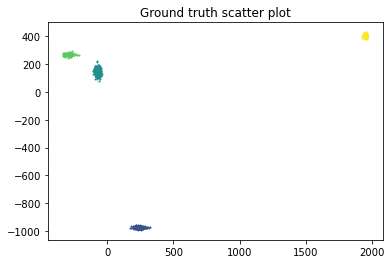

In [6]:
p1 = plt.figure(1)
plt.title(label="Ground truth scatter plot")
for i in range(1, clusters+1):
    cluster_index = np.array(np.where(data_matrix_with_labels[:, -1] == i))
    plt.plot(data_matrix_with_labels[cluster_index, 0],
             data_matrix_with_labels[cluster_index, 1], marker='o', color=colors[i-1, :], markersize=1)
plt.show()

In [7]:
###################### CLUSTIVAT #########################

x = data_matrix_with_labels
n, p = x.shape

tic = time.time()

Pitrue = x[:, -1]
x = x[:, 0:-1]

cp = 10
ns = 300

rv, C, I, ri, cut, smp = clustiVAT(x, cp, ns)

x1, y1 = cut.shape
cut = cut.reshape((x1*y1,))
cuts, ind = -np.sort(-cut), np.argsort(-cut)
ind = np.sort(ind[0:clusters-1])

Pi = np.zeros((n,))
Pi[smp[I[ind[0]-2]]] = 1
Pi[smp[I[ind[-1]:-1]]] = clusters

for i in range(1, clusters-1):
    Pi[smp[I[ind[i-1]:ind[i]-1]]] = i

nsmp = np.setdiff1d(np.linspace(1, clusters, clusters, dtype=int), smp)
r = distance2(x[smp, :], x[nsmp, :])
s = np.argmin(r, axis=0)
Pi[nsmp] = Pi[smp[s]]

RiV, RV, reordering_mat = iVAT(rv, 1)

toc = time.time()
print("Time elapsed : ", str(toc-tic))


D:\SMOP\New folder (2)\MattoPy\clustiVAT\VAT.py:23: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  J = np.delete(J, J == J[j])
D:\SMOP\New folder (2)\MattoPy\clustiVAT\VAT.py:34: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  J = np.delete(J, J == J[j])


Time elapsed :  0.8080284595489502


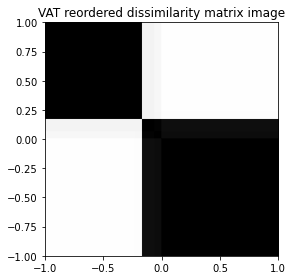

In [17]:
p2 = plt.figure(2)
plt.rcParams["figure.autolayout"] = True
plt.imshow(rv, cmap=cm.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.title(label="VAT reordered dissimilarity matrix image")
plt.show()

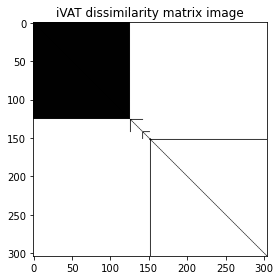

In [15]:
p3 = plt.figure(3)
plt.rcParams["figure.autolayout"] = True
plt.imshow(RiV, cmap=cm.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.title(label="iVAT dissimilarity matrix image")
plt.show()

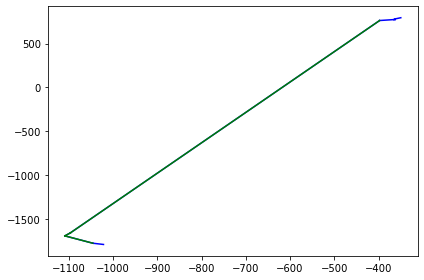

In [12]:
p4 = plt.figure(4)
for i in range(0, np.max(smp.shape)-1):
    x_cor = np.hstack((x[smp[I[i]], 0], x[smp[I[C[i]]], 0]))
    y_cor = np.hstack((x[smp[I[i]], 1], x[smp[I[C[i]]], 1]))
    plt.plot(x_cor, y_cor, 'b')

for i in range(np.max(ind.shape)):
    x_cor = np.hstack((x[smp[I[ind[i]]], 0], x[smp[I[C[ind[i]]]], 0]))
    y_cor = np.hstack((x[smp[I[ind[i]]], 1], x[smp[I[C[ind[i]]]], 1]))
    plt.plot(x_cor, y_cor, 'g')
    
plt.show()

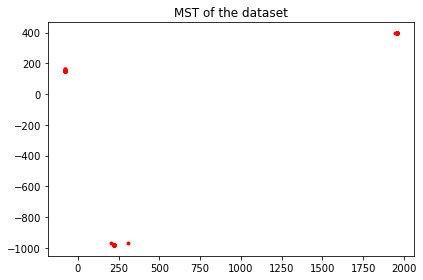

In [13]:
p5 = plt.figure(5)
plt.plot(x[I, 0], x[I, 1], 'r.')
plt.title(label="MST of the dataset")
plt.show()

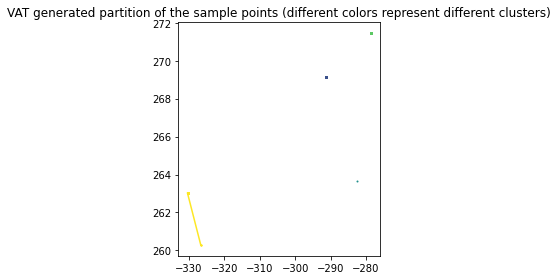

In [14]:
p6 = plt.figure(6)

for i in range(0, clusters):
    if i == 0:
        partition = I[0:ind[i]]
    elif i == clusters-1:
        partition = I[ind[i-1]:np.max(I.shape)]
    else:
        partition = I[ind[i-1]:ind[i]-1]

    plt.plot(x[smp[partition], 0], x[smp[partition], 1],
             marker='o', color=colors[i-1, :], markersize=1)

plt.title('VAT generated partition of the sample points (different colors represent different clusters)')
plt.show()